In [1]:
from model import SugarscapeCg

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams.update({'font.size': 20})

## Helper functions

In [2]:
def run_model(model):
    model.run_model()

    output = model.datacollector.get_model_vars_dataframe()
    print(output)

    return output

In [3]:
def get_data(df, key):
    all_rows = df[0][key].values

    for i in range(1, len(df)):
        wealths = df[i][key].values
        all_rows = np.vstack([all_rows, wealths])

    all_rows = all_rows.T

    return all_rows

In [4]:
def get_means_cis(data):
    means = []
    cis = []

    for i in range(data.shape[0]):
        means.append(np.mean(data[i]))
        cis.append(1.96*np.std(data[i])/np.sqrt(data.shape[0]))

    return means, cis

## Plotting functions

In [5]:
def plot_errorbars(means, cis, y_axis_label):
    plt.errorbar(x=range(len(means)), y=means, yerr=cis, ecolor='red')
    plt.xlabel("Number of steps")
    plt.ylabel(y_axis_label)

In [6]:
def plot_district_crimes(district_means, district_cis, district_names, district_colors):
    for district_index in range(len(district_means)):
        plt.errorbar(x=range(len(district_means[district_index])), y=district_means[district_index], yerr=district_cis[district_index], label=district_names[district_index], color=district_colors[district_index], ecolor=district_colors[district_index])
        plt.xlabel("Number of steps")
        plt.ylabel('Number of crimes')
    plt.legend()

In [7]:
def plot_district_crimes_bar(district_means, district_cis, district_names, district_colors):
    plt.bar(np.arange(len(district_means)), height=district_means, yerr=district_cis, color=district_colors, capsize=10)
    plt.xticks(np.arange(len(district_means)), district_names)
    # plt.xlabel("Number of steps")
    plt.ylabel('Number of crimes')

## Run model

In [8]:
num_runs = 2
outputs = []

for run in range(num_runs):
    m = SugarscapeCg()
    output = run_model(m)
    outputs.append(output)

Initial number Sugarscape Agent:  741
[1, 878.0]
[2, 987.0]
[3, 1128.0]
[4, 1313.0]
[5, 1432.0]
[6, 1574.0]
[7, 1694.0]
[8, 1925.0]
[9, 2055.0]
[10, 2097.0]
[11, 2139.0]
[12, 2201.0]
[13, 2185.0]
[14, 2226.0]
[15, 2371.0]
[16, 2540.0]
[17, 2694.0]
[18, 2912.0]
[19, 2984.0]
[20, 3032.0]
[21, 3178.0]
[22, 3389.0]
[23, 3524.0]
[24, 3715.0]
[25, 3899.0]
[26, 4051.0]
[27, 4189.0]
[28, 4520.0]
[29, 4754.0]
[30, 5032.0]
[31, 5462.0]
[32, 5717.0]
[33, 5996.0]
[34, 6309.0]
[35, 6553.0]
[36, 6890.0]
[37, 7207.0]
[38, 7785.0]
[39, 7990.0]
[40, 8481.0]
[41, 8849.0]
[42, 9399.0]
[43, 9857.0]
[44, 10354.0]
[45, 10739.0]
[46, 11085.0]
[47, 11602.0]
[48, 12286.0]
[49, 12921.0]
[50, 13375.0]
[51, 13795.0]
[52, 14122.0]
[53, 14497.0]
[54, 14847.0]
[55, 15544.0]
[56, 16021.0]
[57, 16454.0]
[58, 16867.0]
[59, 17314.0]
[60, 17697.0]
[61, 18237.0]
[62, 18537.0]
[63, 19214.0]
[64, 19710.0]
[65, 20240.0]
[66, 20525.0]
[67, 20947.0]
[68, 21460.0]
[69, 21885.0]
[70, 22193.0]
[71, 22633.0]
[72, 23171.0]
[73, 235

In [9]:
print(outputs[0])

     Criminal Wealth  Criminal Count  Criminal in Jail Count  Crimes commited  \
0              741.0              45                       0                0   
1              878.0              45                       1               25   
2              987.0              45                       2               49   
3             1128.0              45                       2               73   
4             1313.0              45                       5               98   
..               ...             ...                     ...              ...   
196          74015.0              45                       3             5045   
197          74762.0              45                       4             5080   
198          75208.0              45                       4             5108   
199          75691.0              45                       4             5137   
200          76120.0              45                       5             5165   

     Centrum  Noord  West  

## Plots

### Criminal wealths

In [10]:
all_wealths = get_data(outputs, 'Criminal Wealth')

# print(all_wealths[0])
print(all_wealths.shape)

(201, 2)


In [11]:
mean_wealths, cis_wealths = get_means_cis(all_wealths)

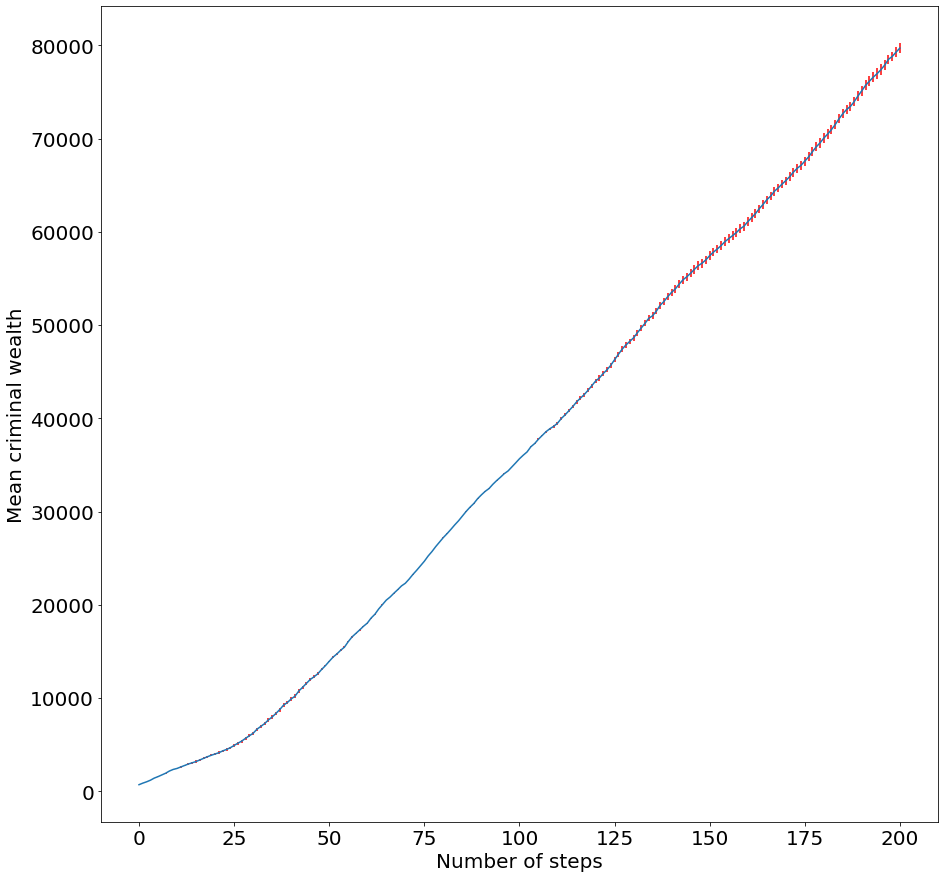

In [12]:
plot_errorbars(mean_wealths, cis_wealths, "Mean criminal wealth")

### Criminals in jail

In [13]:
jail_count = get_data(outputs, 'Criminal in Jail Count')

print(jail_count.shape)

(201, 2)


In [14]:
mean_jail_count, cis_jail_count = get_means_cis(jail_count)

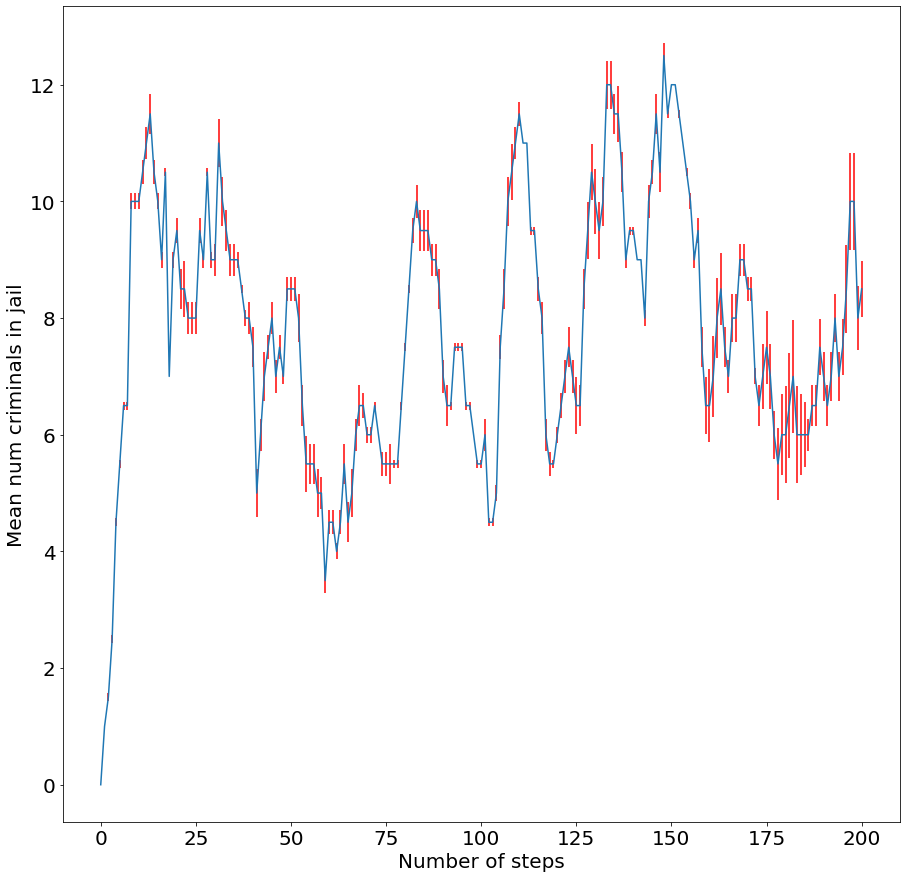

In [15]:
plot_errorbars(mean_jail_count, cis_jail_count, "Mean num criminals in jail")

### Crimes committed

In [16]:
crimes_count = get_data(outputs, 'Crimes commited')

print(crimes_count.shape)

(201, 2)


In [17]:
mean_crimes_count, cis_crimes_count = get_means_cis(crimes_count)

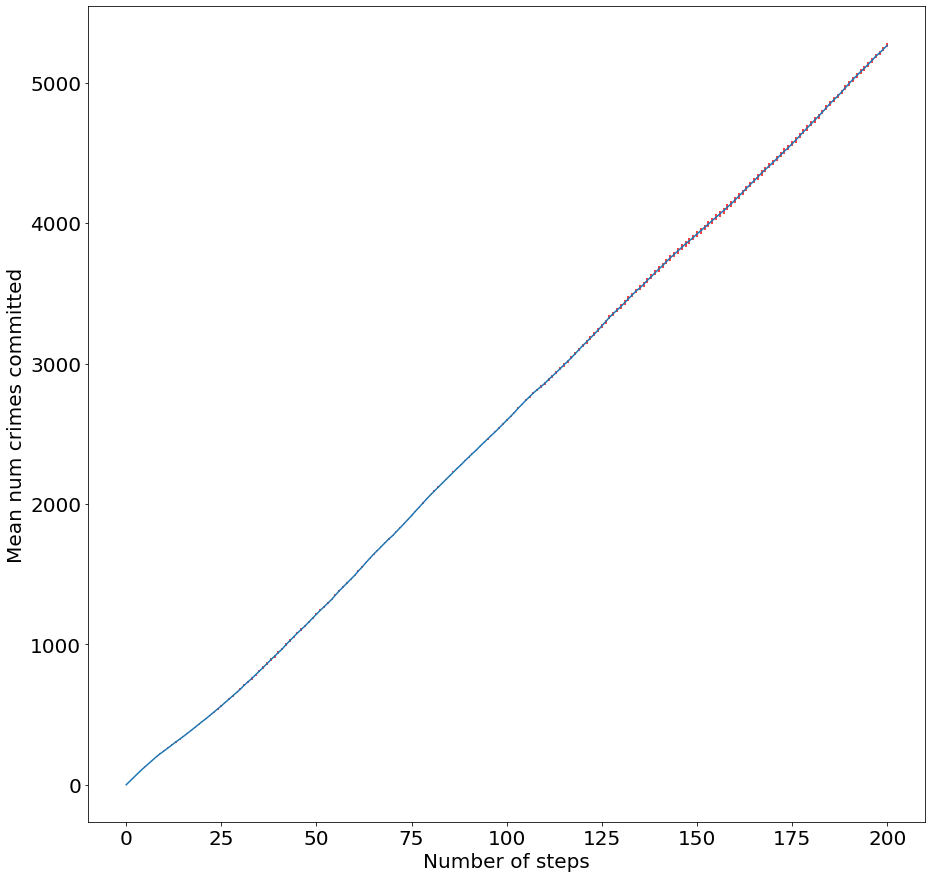

In [18]:
plot_errorbars(mean_crimes_count, cis_crimes_count, "Mean num crimes committed")

### District crimes

In [31]:
district_names = ['Centrum', 'Noord', 'West', 'Zuid', 'Zuidoost', 'Oost', 'Nieuw-West']
# district_colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink']
district_colors = ['#eb534b', '#34b7eb', '#40943d', '#ebc934', '#800080', '#50d950', '#ffc0cb']

In [32]:
all_district_means = []
all_district_cis = []

for district in district_names:
    crimes_count = get_data(outputs, district)
    mean_crimes_count, cis_crimes_count = get_means_cis(crimes_count)
    all_district_means.append(mean_crimes_count)
    all_district_cis.append(cis_crimes_count)

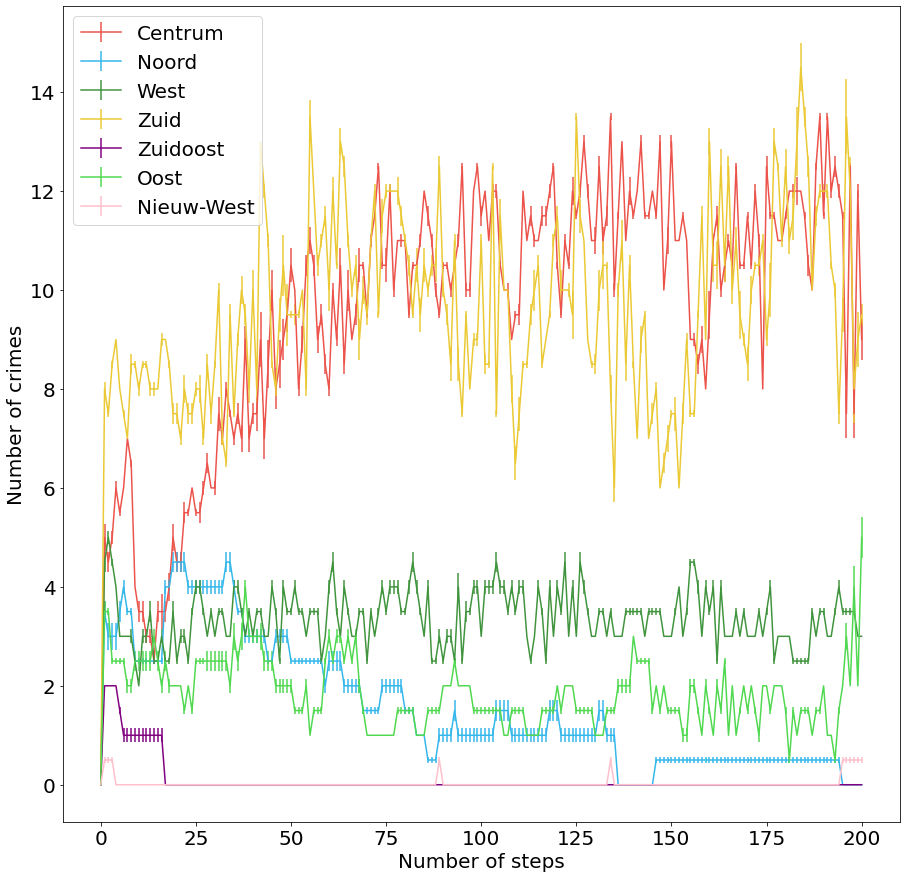

In [33]:
plot_district_crimes(all_district_means, all_district_cis, district_names, district_colors)

In [22]:
print(len(all_district_means))
print(len(all_district_means[0]))

final_district_means = []
for district in all_district_means:
    final_district_means.append(district[-1])

print(final_district_means)

final_district_cis = []
for district in all_district_cis:
    final_district_cis.append(district[-1])

print(final_district_cis)

7
201
[9.0, 0.0, 3.0, 9.5, 0.0, 5.0, 0.5]
[0.41474322212485576, 0.0, 0.0, 0.20737161106242788, 0.0, 0.41474322212485576, 0.06912387035414262]


In [23]:
# Sort by size
sorting = zip(final_district_means, district_names, district_colors)
final_district_means, district_names, district_colors = zip(*sorted(sorting, key=lambda x : x[0]))

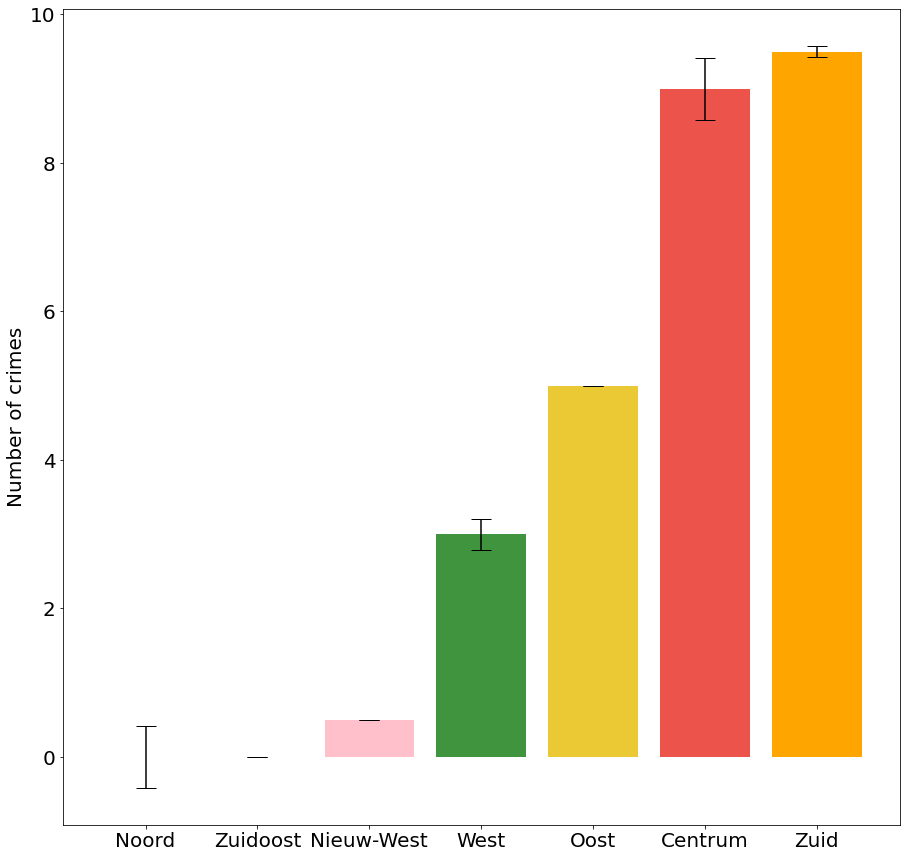

In [24]:
plot_district_crimes_bar(final_district_means, final_district_cis, district_names, district_colors)